In [2]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [5]:
mnist = tf.keras.datasets.mnist #28x28 images of hand written digits 0-9

In [32]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2600 - accuracy: 0.9239
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1063 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0720 - accuracy: 0.9778


In [34]:
val_loss , val_acc = model.evaluate(x_test, y_test)
print(val_loss , val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9721
0.09173949807882309 0.972100019454956


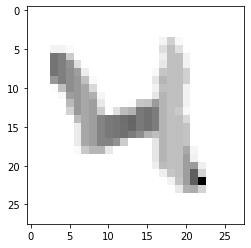

In [24]:
import matplotlib.pyplot as plt
plt.imshow(x_train[20], cmap = plt.cm.binary)

In [37]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [38]:
predictions = new_model.predict(x_test)

In [39]:
predictions

array([[1.09652918e-08, 3.69666764e-09, 2.66489769e-06, ...,
        9.99990821e-01, 6.44101590e-08, 1.93247251e-06],
       [1.64058687e-08, 4.92692234e-05, 9.99797881e-01, ...,
        1.76567116e-08, 1.88808535e-05, 3.13461778e-12],
       [4.88475305e-09, 9.99890208e-01, 4.60316478e-05, ...,
        2.87744861e-05, 2.37838321e-05, 3.48737714e-08],
       ...,
       [4.64832794e-09, 1.19536219e-06, 3.96805433e-07, ...,
        6.01654901e-05, 1.46632065e-05, 2.11350329e-04],
       [1.69230941e-06, 2.85891389e-07, 1.65111231e-08, ...,
        4.91900039e-07, 8.16468708e-03, 1.42246304e-08],
       [2.43560180e-07, 4.77462159e-08, 3.87267562e-07, ...,
        1.86460999e-10, 2.37155255e-08, 2.93719151e-12]], dtype=float32)

In [40]:
import numpy as np

print(np.argmax(predictions[0]))

7


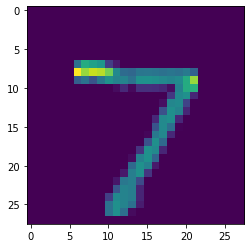

In [43]:
plt.imshow(x_test[0])

1


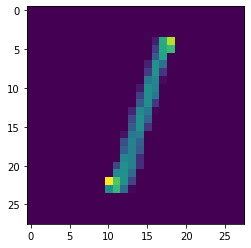

In [44]:
print(np.argmax(predictions[2]))
plt.imshow(x_test[2])

4


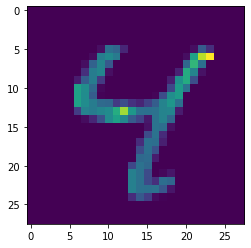

In [45]:
print(np.argmax(predictions[6]))
plt.imshow(x_test[6])

5


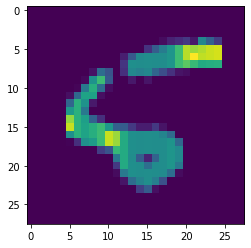

In [46]:
print(np.argmax(predictions[8]))
plt.imshow(x_test[8])